In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import pandas as pd

In [3]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [3]:
death_df = pd.read_csv("time_series_covid19_deaths_global.csv")
death_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [4]:
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [5]:
aus_confirmed = confirmed_df[confirmed_df['Country/Region'] == 'Australia']

In [6]:
aus_confirmed.info

<bound method DataFrame.info of                   Province/State Country/Region      Lat      Long  1/22/20  \
8   Australian Capital Territory      Australia -35.4735  149.0124        0   
9                New South Wales      Australia -33.8688  151.2093        0   
10            Northern Territory      Australia -12.4634  130.8456        0   
11                    Queensland      Australia -27.4698  153.0251        0   
12               South Australia      Australia -34.9285  138.6007        0   
13                      Tasmania      Australia -42.8821  147.3272        0   
14                      Victoria      Australia -37.8136  144.9631        0   
15             Western Australia      Australia -31.9505  115.8605        0   

    1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/12/20  9/13/20  \
8         0        0        0        0        0  ...      113      113   
9         0        0        0        3        4  ...     4166     4170   
10        0        0        0     

In [7]:
# total confirm cases australia (Adding Region data)
tmp = aus_confirmed.iloc[:,4:]
data = tmp.sum()
data

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        4
           ...  
9/17/20    26861
9/18/20    26885
9/19/20    26898
9/20/20    26912
9/21/20    26942
Length: 244, dtype: int64

In [8]:
new_columns = ['AUS_Cnf_Cases']
data= pd.DataFrame(data, columns = new_columns)
data

,AUS_Cnf_Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,4
...,...
9/17/20,26861
9/18/20,26885
9/19/20,26898
9/20/20,26912


<AxesSubplot:>

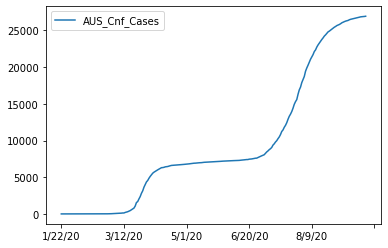

In [9]:
data.plot() 

In [10]:
#Check for Data stationary 
#If p< 0.05 ; Data is stationary
#if p>0.05; Data is not stationary

from statsmodels.tsa.stattools import adfuller
def ad_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
ad_test(data['AUS_Cnf_Cases'])

1. ADF :  -0.6677096478727074
2. P-Value :  0.854937142700393
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 229
5. Critical Values :
	 1% :  -3.4592326027153493
	 5% :  -2.8742454699025872
	 10% :  -2.5735414688888465


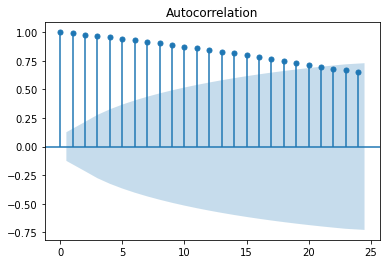

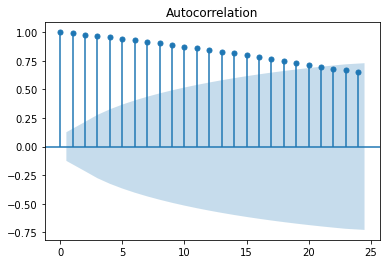

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

## Arima Model

In [90]:
# Test train data split 
print(data.shape)
train=data.iloc[:220] #220 data
test=data.iloc[220:] #24 data
predictions = []
print(test.shape)
print(train.shape)

(244, 1)
(24, 1)
(220, 1)


In [56]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq
    

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [93]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 4526.530148226137
(0, 0, 1) 4233.116242942772
(0, 1, 0) 2842.578233447576
(0, 1, 1) 2699.0910379010766
(0, 1, 2) 2649.903826760664
(0, 1, 3) 2592.0345969754835
(0, 1, 4) 2564.456208434896
(0, 2, 0) 2519.614596728974
(0, 2, 1) 2440.9893676677852
(0, 2, 2) 2429.5108490453986
(0, 2, 3) 2389.9952461171442
(0, 2, 4) 2382.525593960775
(1, 0, 0) 2970.782394258589
(1, 1, 0) 2520.3313853014783
(1, 1, 1) 2453.292585096623
(1, 1, 2) 2441.7561036079824
(1, 1, 3) 2401.8729090369434
(1, 1, 4) 2393.676615625025
(1, 2, 0) 2465.371737127572
(1, 2, 1) 2438.0150752208647
(1, 2, 2) 2384.6441413312277
(1, 2, 3) 2379.616412854346
(1, 2, 4) 2381.5351606325303
(2, 0, 0) 2557.2636644768345
(2, 0, 3) 2424.531603107762
(2, 0, 4) 2417.159548163212
(2, 1, 0) 2474.5774954083245
(2, 1, 1) 2450.325465372436
(2, 1, 3) 2389.7260812567074
(2, 2, 0) 2425.8727195186443
(2, 2, 1) 2426.6352655081964
(2, 2, 2) 2380.3148181876854
(2, 2, 3) 2381.4549417983144
(2, 2, 4) 2383.533265737423
(3, 0, 0) 2500.7599625494613
(

In [94]:
model_arima = ARIMA(train,order=(1,2,3)) # p d q (past,int,errors)
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

2379.616412854346


In [96]:
predictions = model_arima_fit.forecast(steps=24)[0]
predictions

array([25672.97363194, 25772.25451931, 25844.53534687, 25906.20592432,
       25963.80169577, 26019.92867254, 26075.62600282, 26131.30804744,
       26187.14003296, 26243.18784355, 26299.47775055, 26356.02022967,
       26412.81945811, 26469.87710153, 26527.1938241 , 26584.76989067,
       26642.60540685, 26700.70041474, 26759.05493114, 26817.66896274,
       26876.54251222, 26935.67558063, 26995.06816841, 27054.72027571])

In [97]:
test.shape

(24, 1)

In [98]:
predictions.shape

(24,)

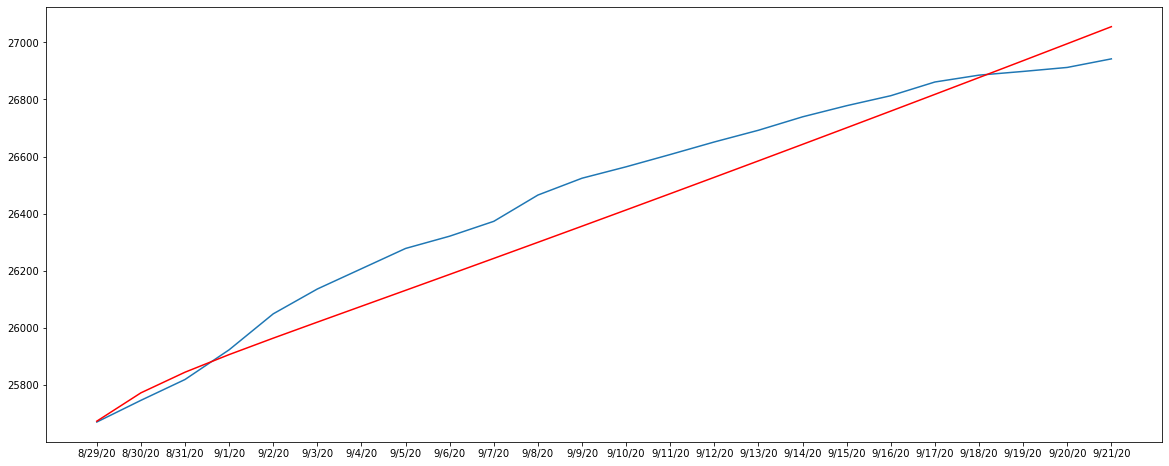

In [99]:
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions,color='red')

In [100]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test.AUS_Cnf_Cases, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 104.315660


## AR Model 

In [101]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [110]:
predictions = model_ar_fit.predict(start=220,end=243)
predictions

2020-08-29    25631.354742
2020-08-30    25729.092158
2020-08-31    25822.285743
2020-09-01    25908.562949
2020-09-02    25996.767727
2020-09-03    26075.939945
2020-09-04    26162.264119
2020-09-05    26246.917221
2020-09-06    26325.606779
2020-09-07    26414.450831
2020-09-08    26504.869827
2020-09-09    26592.645203
2020-09-10    26684.313876
2020-09-11    26774.609281
2020-09-12    26866.544705
2020-09-13    26965.076388
2020-09-14    27063.019472
2020-09-15    27160.612803
2020-09-16    27260.234275
2020-09-17    27360.203581
2020-09-18    27461.756801
2020-09-19    27564.061585
2020-09-20    27666.194067
2020-09-21    27769.356813
Freq: D, dtype: float64

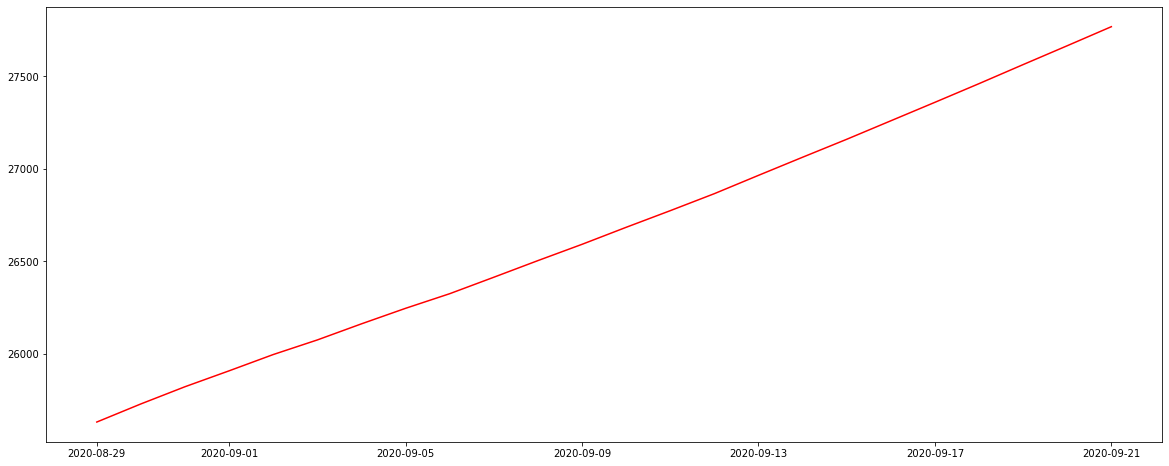

In [126]:
plt.figure(figsize = (20,8))
plt.plot(predictions,color='red')

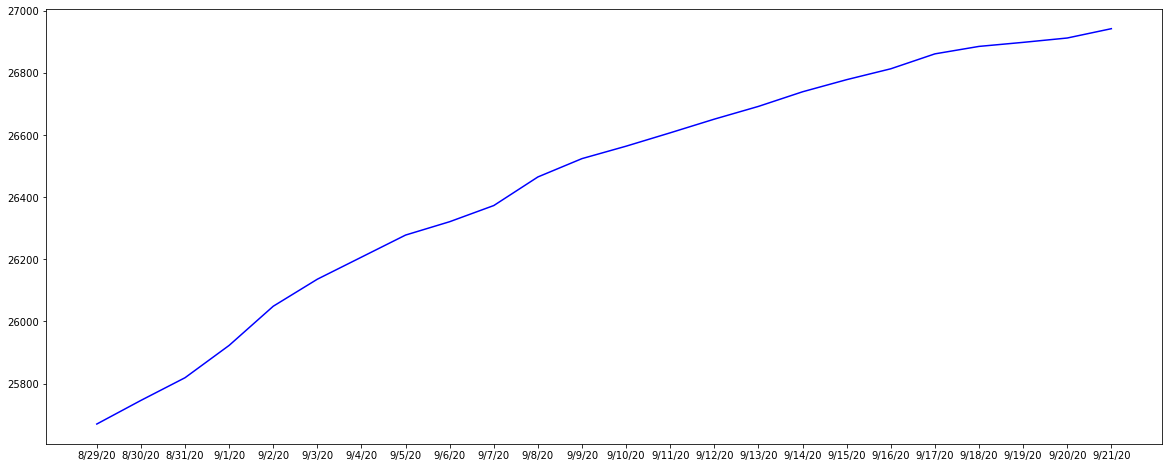

In [129]:
plt.figure(figsize = (20,8))
plt.plot(test,color='blue')

In [141]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 348.209408
